**DATA BOOTCAMP - MBA - PROJECT**

John Moore (jpm573@stern.nyu.edu)

**Abstract:** Defense spending in the United States is often criticized as being too high compared to the rest of the world. How much do we spend on defense as a percentage of the annual budget? How does defense spending in the U.S. compare to other expenses and defense spending of other countries?  

In [1]:
## This cell imports various packages which are needed for the code to run
import pandas as pd                   # pandas is used to organize the data
import matplotlib.pyplot as plt       # Intro/basic graphics 
import seaborn as seab                # Better graphics
import pandas.io.data as dr           # for data 0 from FRED
import datetime                       # for data 0 from FRED
import wbdata as wb                   # access World Bank GDP data. To install, type 'pip install wbdata' in command line
# import pycountry                    # reference only - module is imported in the same cell it is used to reduce confusion

# keeps plots in-line
%matplotlib inline                     

import sys

C:\Users\s36626\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


**Data Sources:**

In [2]:
## Data 0 - USG Spending Breakdown
## Data retrieved using pandas tool from FRED (Federal Reserve Bank of St. Louis)
## http://pandas.pydata.org/pandas-docs/stable/remote_data.html
start=datetime.datetime(1995,1,1)
end=datetime.datetime(2015,12,31)
#defSpend=dr.DataReader('FDEFX','fred',start,end)
df0=dr.DataReader('FDEFX','fred',start,end)
df0a=dr.DataReader('FGEXPND','fred',start,end) #FGEXPND
df0a.columns=['Total Expenses']
df0['Medicare']=dr.DataReader('W824RC1','fred',start,end)
df0['Nondefense Disc.']=dr.DataReader('FNDEFX','fred',start,end)
df0['Social Security']=dr.DataReader('W823RC1','fred',start,end)
df0.columns=['Defense','Medicare','Nondefense Disc.','Social Security']

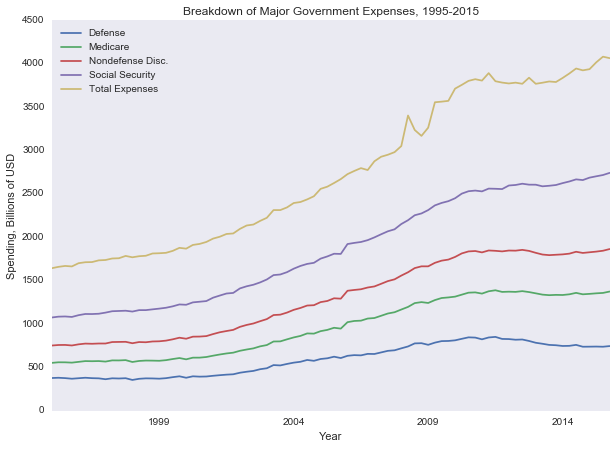

In [3]:
# Plot Data 0 with the four sub-components stacked to show how they compare to total spending.
seab.set_style('dark')
fig, ax = plt.subplots(figsize=(10,7))
df0.plot(ax=ax,stacked=True)
df0a.plot(ax=ax,stacked=False)

# ax.fill_between(df0['Defense'],df0['Medicare'],color='g',interpolate=True)
# Note: I had hoped to use fill_between for the df0 data to provide a better visual 'feel' for what fraction of the total
# each expenses is. In the end I was not able to figure it out.

ax.set_xlabel('Year')
ax.set_ylabel('Spending, Billions of USD')
ax.set_title('Figure 0, Breakdown of Major Government Expenses, 1995-2015')

Note that the four major sub-components of spending (Defense, Medicare, Nondefense Discretionary, and Social Security) are 'stacked' on this plot, showing their total relative to the total government spending. 

Figure 0 demonstrates that the four sub-components combined represenet a large majority of the total spending, about 75% in 2015. Contrary to popular belief, defense spending over this time does not dwarf any of the other four components. They each appear roughly equal on average over this 20 year range.

Data to compare US Government defense spending to the rest of the world (Data 1) is from the Stockholm International Peace Research Institute (SIPRI) (http://www.sipri.org/databases). This is an excellent data set for the military expenditures: it includes spending data for 171 countries broken down in local currency, percentage of GDP, and constant 2014 USD so that it can be easily compared. The data is most complete from 1988 to 2015.  

The spreadsheet selected is for all countries in the SIPRI study and the units are 2014 US dollars. It is imported to the ipython notebook as df1. The data is not 100% complete (e.g. some countries keep better records than others, NATO countries have generally made their records more available). 

In [179]:
## Data 1 - SIPRI Military Spending data
# File location:='C:\Users\John\Desktop\Data Bootcamp\Project\SIPRI2014.xlsx'
# Excel file to be included with submission. The data had to be modified to make country names exactly match ISO definitions
# in pycountry module, see next cell. 
df1=pd.read_excel('SIPRI2014.xlsx')
df1=df1.set_index(['MILEX2014'])
df1=df1.transpose()

Data 2 is GDP and GDP per capita data from the World Bank. This will be added to df1 to show which countries spend the most on defense as a fraction of their GDP, but first the country names have to be converted to 3-character ISO codes to match the WB dataset. The pycountry module is used to automate the conversion between country names and ISO codes. 

In [180]:
# This cell changes country names to 3-letter ISO codes. 
# note: if pycountry is not already installed on the machine, open command prompt and type 'pip install pycountry'
import pycountry              

# get list of countries from SIPRI data in the same order
countryList=list(df1.columns)

# this FOR loop is adapted from the pycountry documentation
input_countries = countryList
countriesISO = {}
for country in pycountry.countries:
    countriesISO[country.name] = country.alpha3    # alpha3 refers to standard 3-letter abbreviation

# this line sets 'Unknown Code' to the countries where the SIPRI name doesn't match pycountry. Had to fix this manually. 
isocodes = [countriesISO.get(country, 'Unknown code') for country in input_countries]

# Print the list to see which names do not match up. Various reasons why this could happen - e.g. 'Dominican Rep.' instead of 
# 'Dominican Republic'. Some countries in the SIPRI set aren't recognized in the pycountry module (e.g. North/South Sudan), these
# were generally fixed manually to match or removed. South Sudan doesn't have great data for defense spending. 

# add ISO codes to SIPRI data df1 so that GDP data (Data 2, see below) can be easily pulled
df1iso=df1

df1iso.columns=isocodes # Replace full country names (series labels) with 3-character ISO codes
df1iso.head()

,DZA,LBY,MAR,TUN,AGO,BEN,BWA,BFA,BDI,CMR,...,ISR,JOR,KWT,LBN,OMN,QAT,SAU,TUR,ARE,YEM
1988,615.027,. .,1815.63,353.521,310.837,69.2525,188.275,74.2334,52.9599,216.875,...,15580.5,1145.33,3893.68,269.249,2625.88,2480.13,22843.8,9162.64,. .,xxx
1989,601.148,. .,1963.33,364.908,398.907,57.4067,203.887,93.345,59.3095,224.738,...,12556.5,911.071,4833.51,. .,2636.35,2073.24,21586.3,10601.7,. .,xxx
1990,642.183,. .,1928.06,335.555,347.291,55.7454,256.877,101.222,62.5076,233.266,...,13450.6,762.723,18649.1,857.238,2961.84,1876.03,27127.3,12810.5,. .,1849.74
1991,657.435,. .,2024.83,343.052,207.807,. .,275.339,84.4779,64.0295,238.371,...,18478.7,972.134,24304,816.348,2453.94,2034.85,25869.8,13168.8,. .,1732.79
1992,1100.11,. .,2008.75,344.903,181.77,. .,255.565,82.7478,65.8083,230.719,...,13961.6,792.188,12318.4,1454.4,2938.91,. .,24314.4,13851.5,. .,1701.88


Data 2 is GDP and GDP per capita data from the World Bank. Now that the aforementioned military spending data is organized by ISO country codes, the wbdata python module can easily retrieve the GDP data for the countries we have defense data for. This is used to compare U.S. defense spending to other countries. 

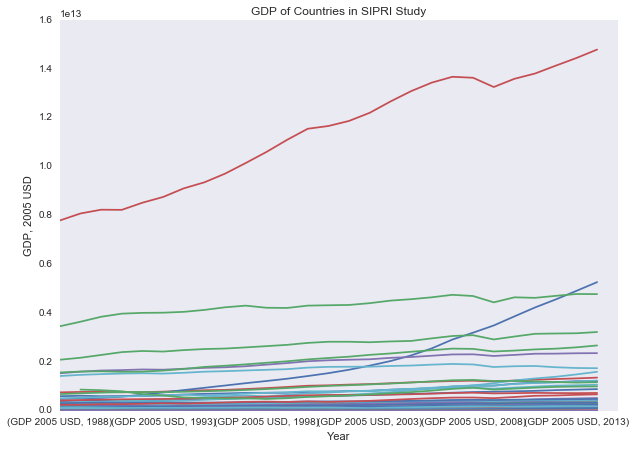

In [101]:
## Data 2 - GDP Data ref http://blogs.worldbank.org/opendata/accessing-world-bank-data-apis-python-r-ruby-stata
## Accessed using wbdata python module and added to SIPRI df1. This is illustrative, it could also be done using DataReader. 
## The updated dataframe is re-identified as df2 for clarity. 
import datetime

df2=df1iso #retrieve the dataframe from previous cell with the ISO codes as variables and defense spending 1988-2015

# A list to tell wb which countries to look for. this creates a list of each country's ISO, still in the proper order
wbcountries=list(df2.columns) 

# A dictionary to tell wbdata which data I want (GDP and GDP per capita)
wbindicator1 = {'NY.GDP.MKTP.KD':'GDP 2005 USD'}
wbindicator2 = {'NY.GDP.PCAP.KD':'GDP per capita 2005 USD'}
wbindicators = {'NY.GDP.MKTP.KD':'GDP 2005 USD','NY.GDP.PCAP.KD':'GDP per capita 2005 USD'}

df2_gdp=wb.get_dataframe(wbindicator1,country=wbcountries,convert_date=False)
df2_gdppc=wb.get_dataframe(wbindicator2,country=wbcountries,convert_date=False)

df2_gdp = df2_gdp.unstack().transpose()          # fixes formatting
df2_gdppc = df2_gdppc.unstack().transpose()

df2_gdp=df2_gdp.drop(df2_gdp.index[0:28])         # quick and dirty way to get the GDP dates to match the SIPRI data
df2_gdppc=df2_gdppc.drop(df2_gdppc.index[0:28])

df2_gdp.head()
df2_gdppc.head()

fig, ax = plt.subplots(figsize=(10,7))
df2_gdp.plot(ax=ax,legend=False)
#df2_gdppc.plot(ax=ax,legend=False)

ax.set_xlabel('Year')
ax.set_ylabel('GDP, 2005 USD')
ax.set_title('GDP of Countries in SIPRI Study')

Not surprisingly, US is dominant in 2014 GDP spending (constant 2005 USD).



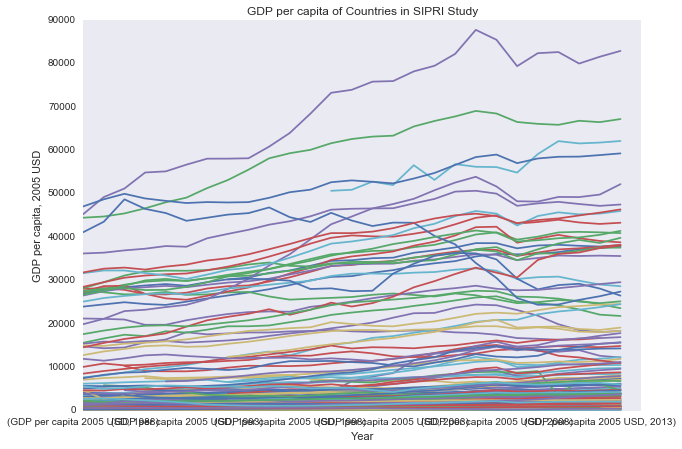

In [102]:
fig, ax = plt.subplots(figsize=(10,7))
df2_gdppc.plot(ax=ax,legend=False)
ax.set_xlabel('Year')
ax.set_ylabel('GDP per capita, 2005 USD')
ax.set_title('GDP per capita of Countries in SIPRI Study')

Also not surprisingly, when using GDP per capita the difference isn't so clear. Scaling defense spending by GDP per capita should be an effective screen to see how much each US citizen is effectively spending on defense compared to citizens of other countries. 

In [138]:
# 'Air gap' in code to avoid breaking Data 2 cells

df3a=df1iso         #defense spending per year, ISO names
df3b=df2_gdp        #gdp, 2005 USD, full country names
df3c=df2_gdppc      #gdppc, 2005 USD, full country names

In [104]:
# Want function: 
# Eliminate all years except 2015 from GDP, GDPPC, and DEF data
# df2_gdp=df2_gdp.drop(df2_gdp.index[0:28])  # quick and dirty way to get the GDP dates to match the SIPRI data

# set up the following as df4

#          DEF   DEF/GDP  LAT  LON  ISO
# Country   X      X/Y     1    1   ALB
# Albania
# Japan

In [139]:
# Separates 2015 Defense spending from the rest of the data (other years), retains ISO codes & ordering
df3aa=df3a.drop(df3a.index[0:27])
df3aa=df3aa.drop(df3aa.index[1])
df3aa=df3aa.T

df3aa.columns=['2015DEF']

In [140]:
#Separates GDP for 2014, in 2005 USD
wbcountries=list(df2.columns)
del wbcountries[-1]
df3b.columns=wbcountries

df3bbb=df3b
df3bbb=df3bbb.drop(df3bbb.index[0:26])
df3bbb=df3bbb.drop(df3bbb.index[1])
df3bbb=df3bbb.T

In [141]:
# Data for GDP per capita, 2014, in 2005 USD
wbcountries=list(df2.columns)           # get ISO codes back
del wbcountries[-1]             
df3c.columns=wbcountries                # convert column names from full names to ISO
df3ccc=df3c
df3ccc=df3ccc.drop(df3ccc.index[0:26])  # drop all but 2014
df3ccc=df3ccc.drop(df3ccc.index[1])     # drop all but 2014
df3ccc=df3ccc.T                         # fulfill want function, 2014 GDPPC as column

In [177]:
# Df4 builds the dataframe described in the 'want function'. This can easily be plotted as a bar graph, but
# with 160+ countries it's very difficult to get anything from it at a glance. 
df4=df3aa
df4['GDP2005']=df3bbb
df4['GDPPC 2005']=df3ccc
df4.head(25)

,2015DEF,GDP2005,GDPPC 2005
DZA,10230.2,1.284862e+10,406.248136
LBY,. .,1.128015e+10,3897.130800
MAR,3740.22,1.320237e+11,3390.932843
TUN,1078.38,NaN,NaN
AGO,3993.88,3.293872e+11,7663.728453
BEN,108.183,7.101922e+09,2362.461223
BWA,436.455,8.887610e+11,37867.767415
BFA,. .,3.499153e+11,40945.359755
BDI,62.5998,3.124318e+10,3276.656970
CMR,414.957,2.437747e+10,17899.211369


In [171]:
# This cell shows the horizontal bar graph mentioned above. Warning, they're huge. 
# fig, ax = plt.subplots(figsize=(10,250))
# df4['GDP2005'].plot(ax=ax,kind='barh')
# df4['GDPPC 2015'].plot(ax=ax,kind='barh')

In [165]:
# This cell is intended to perform operations on the columns, which would be plotted.
# Defense spending / GDP
# Defense spending / GDP per capita

# Then plot and look for outliers. USA spending will be highest by a mile based only on GDP, but will come back 
# to Earth when it's compared on a GDP per capita basis.

#df4.head(25)
#df4['DEF div GDP']=df4['2015DEF']/df4['GDP2005']
#df4['DEF div GDPPC']=df4['2015DEF']/df4['GDPPC 2005']

#df4['DEF div by GDP']=df4['2015DEF'].div(df4['GDP2005'],axis='index')

In [172]:
# Scatter plot, Defense spending vs. GDP

# I have no idea why this doesn't work. It says that the series names
# are not in the index, but they're not supposed to be in the index.

#fig, ax = plt.subplots(figsize=(10,7))

#x=df4['2015DEF'].dropna()
#y=df4['GDP2005'].dropna()

#seab.lmplot(df4['2015DEF'],df4['GDP2005'],data=df4,fit_reg=True)
#seab.lmplot('x','y',data=df4,fit_reg=True)

#ax.set_xlabel('2015 Defense Spending')
#ax.set_ylabel('GDP Year 2014, constant 2005 USD')
#ax.set_title('Defense spending vs. GDP for Countries in SIPRI Study')

In [174]:
# Scatter plot, Defense spending vs. GDP per capita

# I have no idea why this doesn't work. It says that the series names
# are not in the index, but they're not supposed to be in the index.

#fig, ax = plt.subplots(figsize=(10,7))
#df4.plot(x='2015DEF', y='GDPPC 2005', ax=ax[0], kind="scatter",color="blue")

#ax.set_xlabel('2015 Defense Spending')
#ax.set_ylabel('GDP per capita 2014, constant 2005 USD')
#ax.set_title('Defense spending vs. GDP for Countries in SIPRI Study')

**Conclusion:** I've learned a great deal working on this project.

1) I will often find a better way to do something just after I've spent multiple hours doing it another way (e.g. learning to implement pycountry instead of mimicing Chase's example in the plotly lecture).

2) Defining the 'want' function should happen early. Even if you have access to all of the numbers, coordinating the right data in the right place takes a lot of time. I was able to eventually get a dataframe with the 'want' function properly formatted, but it took much longer than I expected. 

3) Dealing with a big dataset made it much harder to spot and fix problems without cheating and using Excel.

4) Even if you get exactly the 'want' function you're looking for, it can take many many hours to get the figures to work correctly. I have a dataFrame with exactly the variables I wanted: Defense spending, GDP, and GDP per capita for all of the countries, with the variables properly ordered. However, I wasn't able to get a scatter plot to work - which on the surface seems like a very easy thing. 

5) I decided to look at the data in Excel (I know, blasphemy) because I became frustrated that this wasn't working in Python. It turns out the US defense spending is certainly the highest, but less so when weighted by GDP or GDP per capita instead of nominal GDP. Countries like Saudi Arabia spend a massive percentage of their GDP per capita on defense because their population is so much smaller than the United States.

6) Even with a well presented display what each country spends on defense, it's hard to get tease the benefits out of it. What's the direction of causality? For example, does war cause defense spending or does defense spending cause war? It's also tough to show that defense spending decreases military casualties, because the countries with the lowest casualties also spend very little on defense (e.g. Switzerland, Luxembourg). 




**Future work:**
1) Figure out what in the data is causing the math operations to fail. The dropna() method doesn't fix it and I can't find any non-float values, but when I perform a math operation it says I can't divide a str.

2) I think it would be better to look at US States rather than countries and compare them based on portion of defense spending (e.g. value of contracts in a state). This data exists, but I came upon it too late in the process to include it. Because states are otherwise similar, metrics such as employmente and education level could be examined using a regression with defense spending as the variable.

**References:** 

[1] http://pandas.pydata.org/pandas-docs/stable/remote_data.html

[2] http://www.sipri.org/databases

[3] The Worold Bank, per wbdata

[4] Pycountry https://pypi.python.org/pypi/pycountry